In [1]:
#Se crea una estructura de un dataframe para cargar los datos
import pandas as pd   
# Permite cargar el modelo logistica de regresión
from sklearn.linear_model import LogisticRegression 

In [2]:
#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
Spo = pd.read_csv("/UCordoba/Machine Learning/Data/SpO2.csv")
#se muestra el dataframe
Spo

,gender,SpO2,target
0,0,80,0
1,0,80,0
2,0,80,0
3,0,81,0
4,0,81,0
...,...,...,...
1203,0,96,1
1204,0,96,1
1205,0,96,1
1206,0,96,1


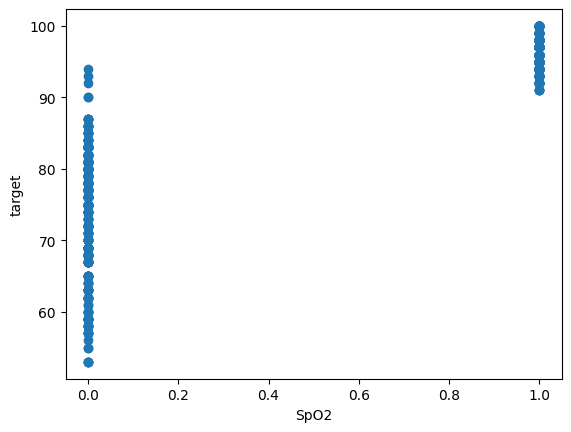

In [4]:
#Se visualiza en una gráfico de dispersión presencia de arañas y tamaño de los granos de arena
import matplotlib.pyplot as plott
%matplotlib inline
plott.ylabel('target')
plott.xlabel('SpO2')
plott.scatter(Spo['target'],Spo['SpO2'])

In [5]:
#Se elimina los espacios al principio y al final de la cadena:
#en el eventual caso de que los hubiera
Spo.columns=Spo.columns.str.strip()

In [6]:
#Se almacena en la variable inputs la variables independientes y en mytarget la variable dependiente
#inputs_X=dfNetwork.drop('src_ip', axis='columns')
# Se elimina la columna id, debido a que no es relevante
#inputs_X=dfNetwork.drop('dst_ip', axis='columns')

In [8]:
#En X se separan las variables independientes, en este caso el tamo de los granos de arena
#X= dfNetwork[['src_port','dst_port','bidirectional_first_seen_ms','bidirectional_last_seen_ms','bidirectional_bytes']]
X= Spo[['gender','SpO2']]
#X= dfHeart[['age','gender','impluse','pressurelow','glucose','kcm']]
X                 
#En y se asigna la variable dependiente que en este caso presencia de arañas (donde 1 indicia que hay arañas y 0 no hay arañas)
y=Spo['target']
#Se visualizan las variables independientes 
X.head()

,gender,SpO2
0,0,80
1,0,80
2,0,80
3,0,81
4,0,81


In [67]:
#train_test_split permite la separación de datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
#Se dividen los datos en en entrenamiento y pruebas, además se define mediante test_size=0.2 el porcentaje para pruebas
#También se puede definir de forma aleatoria que datos se utilizarán para el entrenamiento mediante random_state=10
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=30)

In [68]:
#Permite viusalizar información del dataframe
Spo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  1208 non-null   int64
 1   SpO2    1208 non-null   int64
 2   target  1208 non-null   int64
dtypes: int64(3)
memory usage: 28.4 KB


In [69]:
#permite mostrar estadísticas del resumen de las variables numéricas
round(Spo.describe(),2)

,gender,SpO2,target
count,1208.00,1208.00,1208.0
mean,0.29,85.90,0.5
std,0.46,11.69,0.5
min,0.00,53.00,0.0
25%,0.00,77.00,0.0
50%,0.00,91.00,0.5
75%,1.00,96.00,1.0
max,1.00,100.00,1.0


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit_transform se utiliza para el ajuste  de parámetros iniciales de acuerdo al conjunto de datos de entrenamiento
#además devuelve la trnasformada
X_train = scaler.fit_transform(X_train)
#scaler.transform se utiliza para para calcular la media y la desviación estándar en un conjunto de entrenamiento para poder volver a aplicar más tarde,
#la misma transformación en el conjunto de prueba.
X_test = scaler.transform(X_test)

In [71]:
#X_train

In [72]:
y_train

351     0
1190    1
424     1
1121    1
55      0
       ..
919     0
1164    1
500     0
941     0
421     1
Name: target, Length: 845, dtype: int64

In [73]:
#Permite conocer cuantas variables se van a utilizar
cols=X.columns

In [74]:
#Se define a los datos de entrenamiento el número de columnas del dataframe que corresponden a las variables independientes
X_train = pd.DataFrame(X_train, columns=[cols])

In [75]:
#Visualiza las estadísticas del las diferentes variables independientes
X_train.describe()

,gender,SpO2
count,8.450000e+02,8.450000e+02
mean,-7.567911e-17,5.781043e-18
std,1.000592e+00,1.000592e+00
min,-6.408467e-01,-2.826168e+00
25%,-6.408467e-01,-6.978018e-01
50%,-6.408467e-01,4.940832e-01
75%,1.560436e+00,9.197563e-01
max,1.560436e+00,1.175160e+00


In [76]:
from sklearn.linear_model import LogisticRegression 
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
modelreg=LogisticRegression()
modelreg.fit(X_train,y_train)

LogisticRegression()

In [77]:
#Permite la normalización de los datos de entrenamiento  normalmente distribuidos estándar: Gaussian con media cero y varianza de unidad
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

In [78]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [79]:
def get_score(model, X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [80]:
get_score(LogisticRegression(),X_train,X_test,y_train,y_test)

0.9944903581267218

In [81]:
get_score(SVC(),X_train,X_test,y_train,y_test)

0.9972451790633609

In [82]:
get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)

1.0

In [83]:
get_score(GaussianNB(),X_train,X_test,y_train,y_test)

0.9972451790633609

In [84]:
from sklearn import preprocessing
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB

lg_score = []
svm_score = []
rf_score = []
nby_score = []
lda_score = []
knc_score = []
dtree_score = []
for train_index,test_index in kf.split(X):
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
    #scale preprocesa los datos para ser normalizados posteriormente
    scaler = preprocessing.StandardScaler().fit(X_train)
    y_train,y_test=y[train_index],y[test_index]
    #Normaliza los datos
    X_scaled = scaler.transform(X_train)
    lg_score.append(get_score(LogisticRegression(),X_scaled,X_test,y_train,y_test))
    svm_score.append(get_score(SVC(),X_train,X_test,y_train,y_test))
    rf_score.append(get_score(RandomForestClassifier(n_estimators=20),X_train,X_test,y_train,y_test))
    nby_score.append(get_score(GaussianNB(),X_train,X_test,y_train,y_test))
    lda_score.append(get_score(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test))
    knc_score.append(get_score(KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree'),X_train,X_test,y_train,y_test))
    dtree_score.append(get_score(DecisionTreeClassifier(criterion='entropy'),X_train,X_test,y_train,y_test))

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [85]:
lg_score

[0.3512396694214876,
 0.5743801652892562,
 0.4628099173553719,
 0.4979253112033195,
 0.6141078838174274]

In [86]:
svm_score

[1.0, 0.9793388429752066, 1.0, 1.0, 1.0]

In [87]:
rf_score

[1.0, 0.987603305785124, 1.0, 1.0, 0.7676348547717843]

In [88]:
nby_score

[1.0, 0.987603305785124, 1.0, 0.983402489626556, 1.0]

In [89]:
lda_score

[1.0, 0.9710743801652892, 1.0, 0.979253112033195, 0.983402489626556]

In [90]:
knc_score

[1.0, 0.9793388429752066, 1.0, 1.0, 1.0]

In [91]:
dtree_score

[1.0, 0.9793388429752066, 1.0, 0.983402489626556, 0.7676348547717843]

In [92]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(),X_train,y_train)

array([1.       , 0.9742268, 1.       , 1.       , 1.       ])

In [93]:
cross_val_score(LogisticRegression(),X_train,y_train)

array([1.       , 0.9742268, 1.       , 1.       , 1.       ])

In [94]:
cross_val_score(RandomForestClassifier(n_estimators=40),X_train,y_train)

array([1.        , 0.9742268 , 1.        , 1.        , 0.97927461])

In [95]:
cross_val_score(GaussianNB(),X_train,y_train)

array([1.        , 0.98453608, 1.        , 1.        , 0.97927461])

In [96]:
cross_val_score(LinearDiscriminantAnalysis(),X_train,y_train)

array([1.        , 0.9742268 , 1.        , 0.96373057, 0.98445596])

In [97]:

cross_val_score(KNeighborsClassifier(),X_train,y_train)

array([1.       , 0.9742268, 1.       , 1.       , 1.       ])

In [98]:
cross_val_score(DecisionTreeClassifier(),X_train,y_train)

array([1.        , 0.9742268 , 1.        , 1.        , 0.97927461])

In [99]:
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se instancia el modelo de clasificación
model = RandomForestClassifier()
#Al modelo se le pasan los parámetros de entrenamiento
model.fit(X_train,y_train)

RandomForestClassifier()

In [100]:
#Se visualizan las predicciones de acuerdo al dataset de prueba
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [101]:
#Se utiliza la matriz de confusión para observar las aproximaciones del modelo
from sklearn.metrics import  confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[ 93,   0],
       [  0, 148]], dtype=int64)

Text(91.72222222222221, 0.5, 'True')

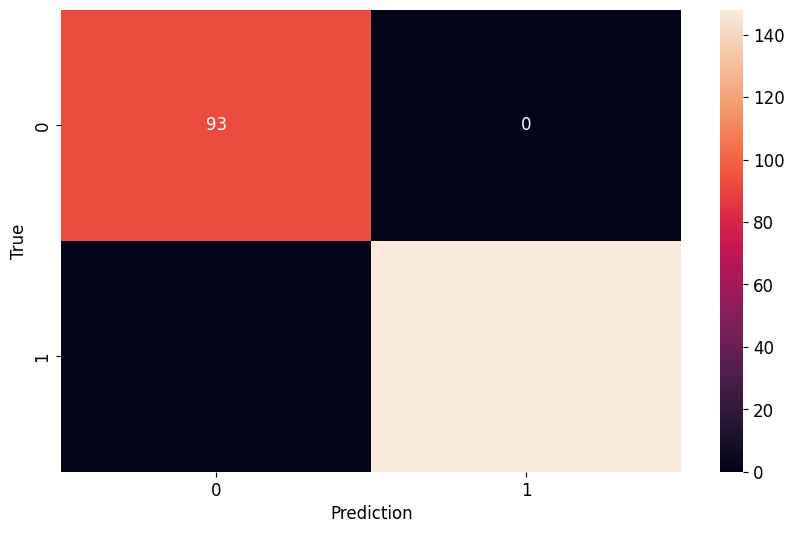

In [102]:
#seaborn es una biblioteca para hacer gráficos estadísticos
#Si tiene problemas para ejecutar seaborn ejecute la siguiente instruccion: pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('True')

In [103]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 93   0]
 [  0 148]]

True Positives(TP) =  93

True Negatives(TN) =  148

False Positives(FP) =  0

False Negatives(FN) =  0


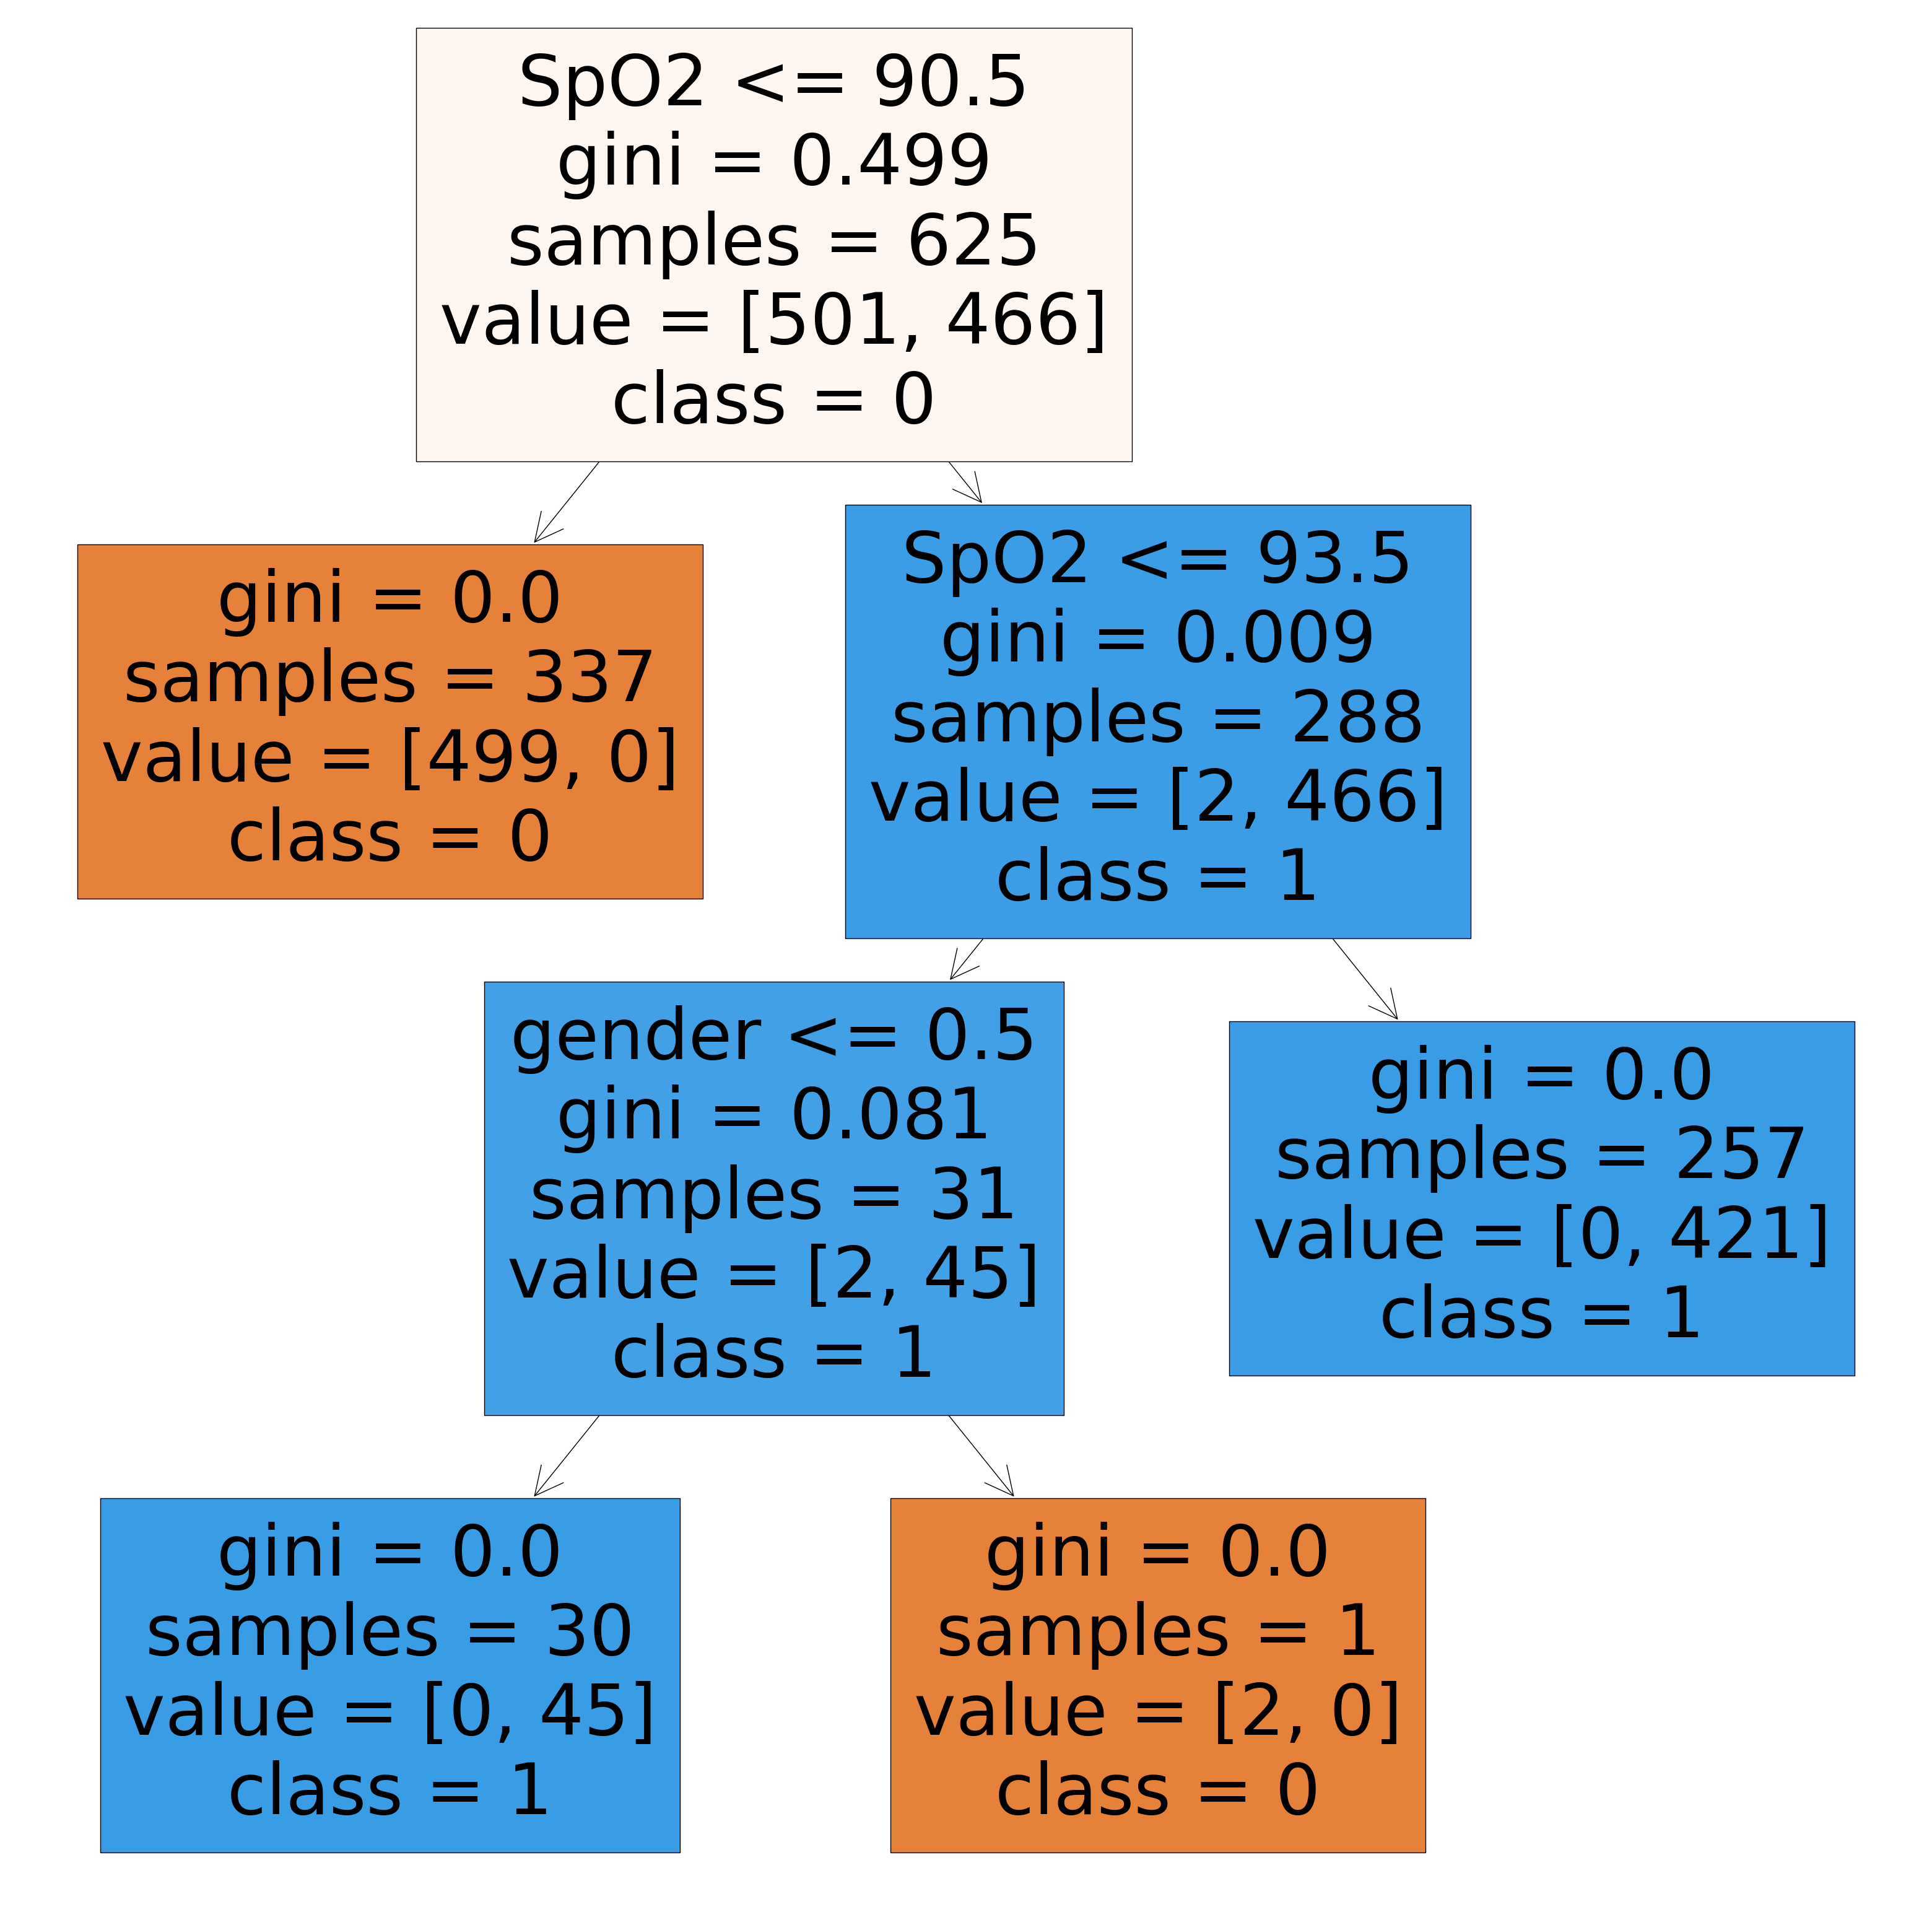

In [104]:
#Se viualiza de forma gráfica la estimación del bosque aleatorio mediante
#un árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(model.estimators_[3], feature_names = X_train.columns,class_names=["0", "1"],filled=True);

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'SpO2'}>]], dtype=object)

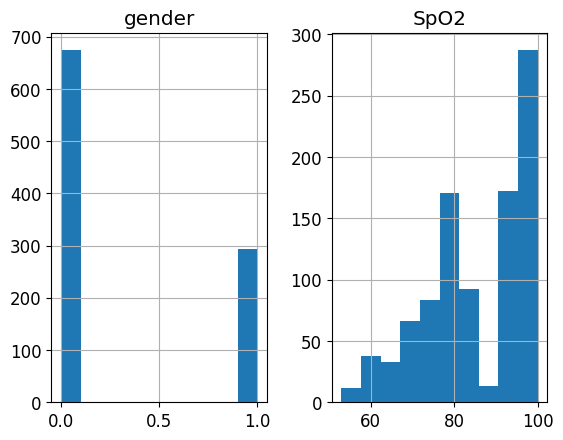

In [105]:
%matplotlib inline
X_train.hist()

In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00       148

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



In [107]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [108]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [109]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [110]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [111]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [112]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [113]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


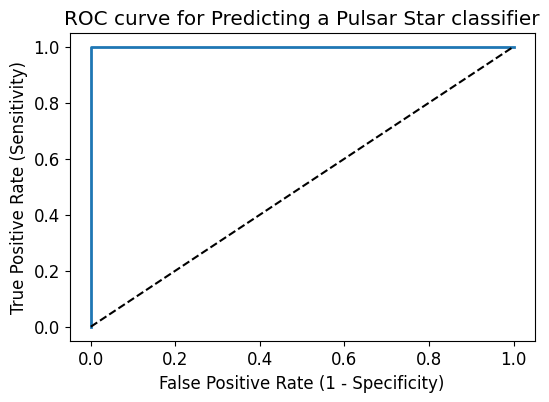

In [114]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [115]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_predicted)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 1.0000


In [116]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9971


In [117]:
Spo.corr()

,gender,SpO2,target
gender,1.000000e+00,0.070459,1.511913e-18
SpO2,7.045893e-02,1.000000,8.851128e-01
target,1.511913e-18,0.885113,1.000000e+00


              gender      SpO2        target
gender  1.000000e+00  0.070459  1.511913e-18
SpO2    7.045893e-02  1.000000  8.851128e-01
target  1.511913e-18  0.885113  1.000000e+00
Matrix de correlacion


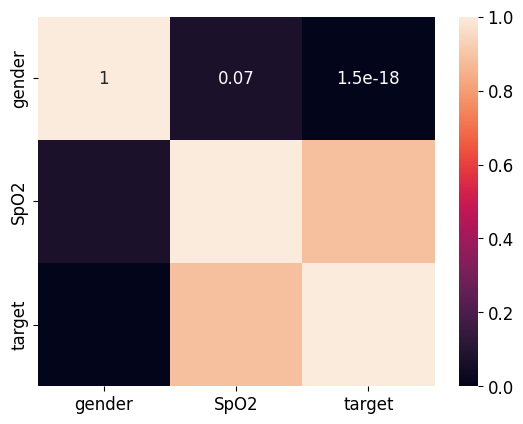

In [118]:
import seaborn as sn
correlation_matrix= Spo.corr()
print(correlation_matrix)
sn.heatmap(correlation_matrix, annot=True)
print('Matrix de correlacion')
plt.show()



In [119]:
import numpy as np
covMatrix=Spo.cov()
print (covMatrix)


              gender        SpO2        target
gender  2.080249e-01    0.375612 -1.471712e-17
SpO2    3.756125e-01  136.613156  5.174814e+00
target -1.471712e-17    5.174814  2.502071e-01


<Axes: >

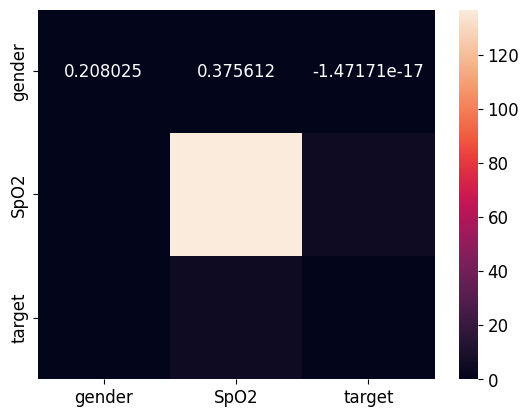

In [120]:
sn.heatmap(covMatrix, annot=True, fmt='g')